/tmp/ipykernel_2464208/3545420065.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{i:.0f}' for i in ax.get_yticks()], fontsize=16)


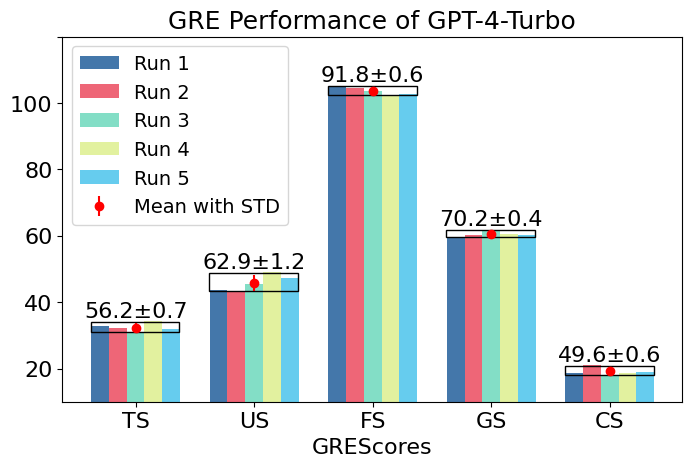

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided table
runs = ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5']
ts_scores = [56.4, 56.1, 55.3, 57.1, 55.9]
us_scores = [61.8, 61.7, 62.7, 64.6, 63.7]
fs_scores = [92.4, 92.3, 91.8, 91.1, 91.3]
gs_scores = [69.8, 70.1, 70.9, 70.2, 70.1]
cs_scores = [49.4, 50.6, 49.1, 49.3, 49.5]

# Calculate means and standard deviations for each metric
means = np.array([np.mean(ts_scores), np.mean(us_scores), np.mean(fs_scores), np.mean(gs_scores), np.mean(cs_scores)])
stds = np.array([np.std(ts_scores, ddof=1), np.std(us_scores, ddof=1), np.std(fs_scores, ddof=1), np.std(gs_scores, ddof=1), np.std(cs_scores, ddof=1)])

# Nature-friendly color palette (accessible for colorblindness and black/white printing)
colors = ['#4477AA', '#EE6677', '#83DEC6', '#E2F19F', '#66CCEE']

# Create index for each tick position
x_ticks = np.arange(len(means))

# Create the figure and the bar plot
fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.15

# Adjusted the range to accommodate the number of bars
adjusted_width = bar_width * (len(runs) + 1)

# Create bars for each run with offset to prevent overlap
bars = []
for i, (run, color) in enumerate(zip(runs, colors)):
    scores = [ts_scores[i], us_scores[i], fs_scores[i], gs_scores[i], cs_scores[i]]
    bar = ax.bar(x_ticks + i * bar_width - adjusted_width / 2 + 0.15, scores, width=bar_width, label=run, color=color)
    bars.append(bar)

# Add error bars for mean values
error_bars = ax.errorbar(x_ticks, means, yerr=stds, fmt='o', color='r', label='Mean with STD')

# Add value labels and error bars on top of each bar
for i in range(len(x_ticks)):
    for j in range(len(runs)):
        rect = bars[j][i]
        height = rect.get_height()
        # ax.text(rect.get_x() + rect.get_width()/2, height, f'{height:.1f}', ha='center', va='bottom')
    # Add error bar text
    ax.text(x_ticks[i], means[i] + stds[i] +0.3, f'{means[i]:.1f}±{stds[i]:.1f}', ha='center', va='bottom', fontsize=16)
    
# Add error boxes
for i in range(len(means)):
    ax.add_patch(plt.Rectangle((x_ticks[i] - 0.53 + bar_width, means[i] - stds[i]),
                               bar_width * 5, stds[i] * 2 +0.26, fill=False, edgecolor='black', lw=1))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('GREScores', fontsize=16)
# ax.set_ylabel('Scores', fontsize=14)
ax.set_title('GRE Performance of GPT-4-Turbo', fontsize=18)
ax.set_xticks(x_ticks)
ax.set_xticklabels(['TS', 'US', 'FS', 'GS', 'CS'], fontsize=16)
ax.set_yticklabels([f'{i:.0f}' for i in ax.get_yticks()], fontsize=16)
ax.legend(fontsize=14, loc='upper left')

# Set y-axis limits
ax.set_ylim(45, 100)

# Increase bottom margin to prevent x-labels from being cut off in the saved image
plt.subplots_adjust(bottom=0.15)


# Show the plot
plt.savefig('gre_perf_multi_runs.pdf', bbox_inches='tight', dpi=600)


/tmp/ipykernel_306734/2880556832.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Model", x=metric, data=df, ax=ax[i], orient="h", palette=palette)
/tmp/ipykernel_306734/2880556832.py:30: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(y="Model", x=metric, data=df, ax=ax[i], orient="h", palette=palette)
/tmp/ipykernel_306734/2880556832.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(['Vicuna-33B', 'LLaMA-2-70B', 'GPT-3.5-Turbo', 'GPT-4-Turbo', 'OpenChat-3.5'], fontsize=20, fontproperties=custom_font)
/tmp/ipykernel_306734/2880556832.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same eff

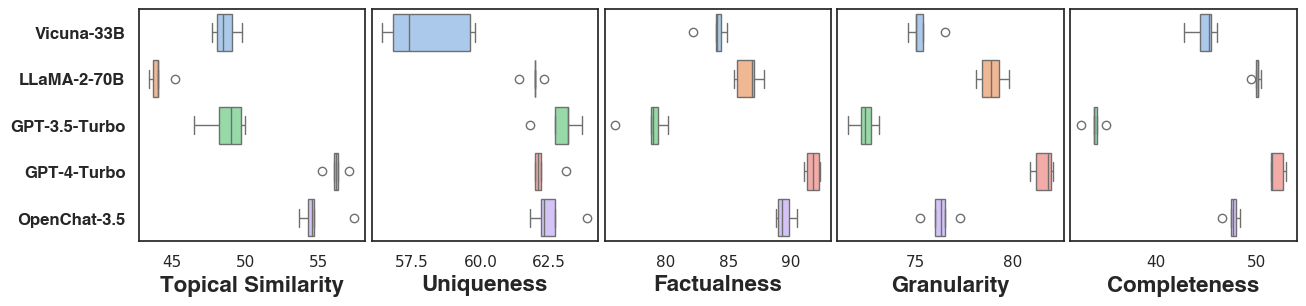

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager

custom_font = font_manager.FontProperties(fname='/home/pj20/GREScore/Helvetica-Bold.ttf')


# Load the data from the uploaded file
data = {
    "Topical Similarity": [49.8, 48.1, 48.5, 47.7, 49.1, 45.2, 43.4, 43.7, 44.0, 44.0, 48.2, 49.7, 50.0, 46.5, 49.0, 56.4, 56.1, 55.3, 57.1, 56.2, 57.5, 54.3, 54.6, 54.7, 53.7],
    "Uniqueness": [56.4, 59.8, 57.4, 56.8, 59.6, 62.0, 61.4, 62.0, 62.3, 62.0, 61.8, 63.2, 62.7, 63.7, 63.2, 62.0, 62.0, 62.2, 63.1, 62.1, 61.8, 62.3, 62.2, 63.9, 62.7],
    "Factualness": [84.4, 84.0, 84.9, 82.2, 84.1, 87.1, 87.9, 86.9, 85.7, 85.5, 80.2, 79.4, 79.0, 75.9, 78.8, 92.4, 92.3, 91.8, 91.1, 91.3, 90.5, 88.8, 89.0, 89.3, 89.9],
    "Granularity": [75.4, 74.6, 75.0, 75.0, 76.5, 78.4, 79.3, 78.1, 78.9, 79.8, 72.7, 72.2, 71.5, 73.1, 72.4, 81.2, 80.9, 82.1, 81.8, 82.0, 76.0, 77.3, 76.3, 76.5, 75.2],
    "Completeness": [46.1, 44.4, 45.3, 42.8, 45.5, 50.2, 50.5, 50.0, 50.2, 49.5, 32.5, 35.0, 33.8, 33.8, 34.1, 52.7, 53.0, 51.5, 51.6, 51.5, 47.7, 48.4, 48.0, 46.6, 47.5],
    "Model": ['Vicuna-33B']*5 + ['LLaMA-2-70B']*5 + ['GPT-3.5-Turbo']*5 + ['GPT-4-Turbo']*5 + ['OpenChat-3.5']*5
}
df = pd.DataFrame(data)

sns.set(style="white")
# Creating boxplot for each metric
metrics = ["Topical Similarity", "Uniqueness", "Factualness", "Granularity", "Completeness"]
palette = sns.color_palette("pastel")

# Adjusting the plot settings for horizontal placement and using the new color palette
fig, ax = plt.subplots(1, 5, figsize=(13, 3))

# Creating horizontal boxplot for each metric with the specified color palette
for i, metric in enumerate(metrics):
    sns.boxplot(y="Model", x=metric, data=df, ax=ax[i], orient="h", palette=palette)
    # Remove y-axis labels and ticks on all but the first plot
    if i != 0:
        ax[i].set_ylabel('')
        ax[i].set_yticks([])
    else:
        ax[i].set_ylabel('', fontsize=20, fontproperties=custom_font)
        ax[i].set_yticklabels(['Vicuna-33B', 'LLaMA-2-70B', 'GPT-3.5-Turbo', 'GPT-4-Turbo', 'OpenChat-3.5'], fontsize=20, fontproperties=custom_font)
    ax[i].set_xlabel(metric, fontsize=16, fontproperties=custom_font)

# Use tight_layout with an additional pad parameter if needed
plt.tight_layout(pad=0.4)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.03)  # You can adjust this value to suit your needs

# Save the figure
plt.savefig('gre_perf_multi_runs.pdf', bbox_inches='tight', dpi=600)
plt.show()

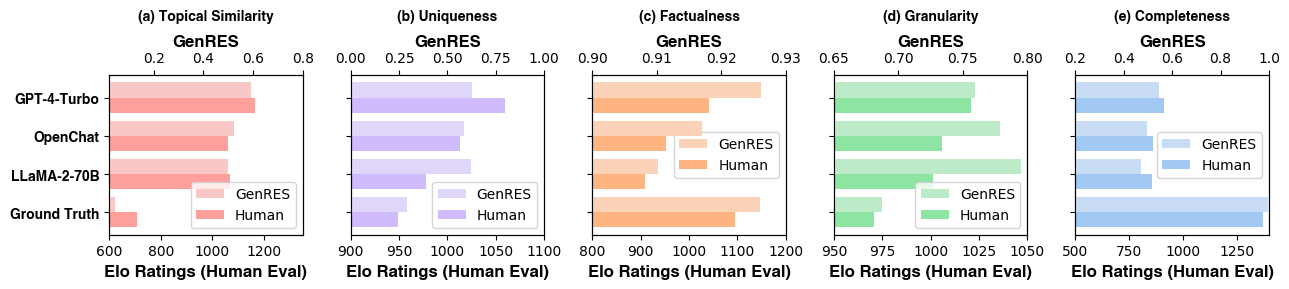

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager

custom_font = font_manager.FontProperties(fname='/home/pj20/GREScore/Helvetica-Bold.ttf')

# Data Preparation
categories = ["Topical", "Uniqueness", "Factualness", "Granularity", "Completeness"]
models = ["Groundtruth", "LLaMA2-70b", "Openchat", "GPT-4-Turbo"]

# Elo ratings for each category
elo_ratings = {
    "Topical": {"Groundtruth": 708, "GPT-4-Turbo": 1165, "Openchat": 1059, "LLaMA2-70b": 1067},
    "Uniqueness": {"Groundtruth": 949, "GPT-4-Turbo": 1059, "Openchat": 1013, "LLaMA2-70b": 978},
    "Factualness": {"Groundtruth": 1094, "GPT-4-Turbo": 1042, "Openchat": 953, "LLaMA2-70b": 910},
    "Granularity": {"Groundtruth": 971, "GPT-4-Turbo": 1021, "Openchat": 1006, "LLaMA2-70b": 1001},
    "Completeness": {"Groundtruth": 1370, "GPT-4-Turbo": 914, "Openchat": 861, "LLaMA2-70b": 855},
}

# Automated scores for each category
automated_scores = {
    "Completeness": {"LLaMA2-70b": 0.47, "GPT-4-Turbo": 0.545, "Openchat": 0.495, "Groundtruth": 0.9947916666666666},
    "Factualness": {"LLaMA2-70b": 0.9101528138528133, "GPT-4-Turbo": 0.9261104465709728, "Openchat": 0.9169444444444443, "Groundtruth": 0.926},
    "Granularity": {"LLaMA2-70b": 0.7947036840268796, "GPT-4-Turbo": 0.7596207862197314, "Openchat": 0.7788184104971542, "Groundtruth": 0.6870097376678056},
    "Topical": {"LLaMA2-70b": 0.49791686969414096, "GPT-4-Turbo": 0.5914792349910096, "Openchat": 0.5220243533241367, "Groundtruth": 0.04284611353612888},
    "Uniqueness": {"LLaMA2-70b": 0.6197593073593073, "GPT-4-Turbo": 0.628600592390066, "Openchat": 0.5866212121212121, "Groundtruth": 0.29}
}

import seaborn as sns

# Define the pastel palette
pastel_palette = sns.color_palette("pastel")

# Initialize the metric colors dictionary with the new color scheme
metric_colors = {}
metrics = ["Completeness", "Factualness", "Granularity", "Topical", "Uniqueness"]

for i, metric in enumerate(metrics):
    # Define the colors for elo and real_score
    elo_color = pastel_palette[i]
    # Create a lighter version of the elo color for real_score
    real_score_color = sns.light_palette(elo_color, n_colors=3)[1]

    # Update the metric colors dictionary
    metric_colors[metric] = {"elo": elo_color, "real_score": real_score_color}
    
scales_elo = {
    "Completeness": [500, 1400],
    "Factualness": [800, 1200],
    "Granularity": [950, 1050],
    "Topical": [600, 1350],
    "Uniqueness": [900, 1100]
}

scales_score = {
    "Completeness": [0.2, 1.0],
    "Factualness": [0.90, 0.93],
    "Granularity": [0.65, 0.80],
    "Topical": [0.02, 0.80],
    "Uniqueness": [0, 1.0]
}

categories = ["Topical", "Uniqueness", "Factualness", "Granularity", "Completeness"]
models = ["Groundtruth", "LLaMA2-70b", "Openchat", "GPT-4-Turbo"]
models_x_labels = ['Ground Truth', 'LLaMA-2-70B', 'OpenChat', 'GPT-4-Turbo']
subtitles = ["(a) Topical Similarity", "(b) Uniqueness", "(c) Factualness", "(d) Granularity", "(e) Completeness"]

# Elo ratings and automated scores for each category (as provided in the previous cell)
# metric_colors and scales_elo as provided in the previous cell

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13, 3))  # Change the subplot orientation

for idx, category in enumerate(categories):
    ax1 = axes[idx]
    elo_scores = [elo_ratings[category].get(model, 0) for model in models]
    auto_scores = [automated_scores[category].get(model, 0) for model in models]

    # Set position of bar on X axis
    bar_width = 0.4
    r1 = np.arange(len(elo_scores))
    r2 = [x + bar_width for x in r1]

    # Plotting Elo ratings horizontally
    bars1 = ax1.barh(r1, elo_scores, color=metric_colors[category]["elo"], height=bar_width, label='Human Eval')

    # Setting Elo rating scale for this plot
    ax1.set_xlim(scales_elo[category])

    # Add yticks on the middle of the group bars
    ax1.set_yticks([r + 0.5 * bar_width for r in range(len(elo_scores))])
    ax1.set_xlabel('Elo Ratings (Human Eval)', color='black', fontsize=12, fontproperties=custom_font) 
    if idx == 0:
        ax1.set_yticklabels(models_x_labels, fontsize=16, fontproperties=custom_font)  # , fontsize=12, fontproperties=custom_font)  # Commented out the custom font usage
    else:
        ax1.set_yticklabels([])
    ax1.tick_params(axis='y', labelcolor='black')

    # Creating a second x-axis for the real scores
    ax2 = ax1.twiny()
    ax2.set_xlim(scales_score[category])

    # Plotting Real scores horizontally with shade
    bars2 = ax2.barh(r2, auto_scores, color=metric_colors[category]["real_score"], height=bar_width, label='GenRES')

    # Set labels and title
    ax2.set_xlabel('GenRES', color='black', fontsize=12, fontproperties=custom_font)  # , fontsize=12, fontproperties=custom_font)  # Commented out the custom font usage

    if idx ==0 or idx == 1 or idx ==3:
        axes[idx].legend([bars2, bars1], ['GenRES', 'Human'], loc='lower right')
    else: 
        axes[idx].legend([bars2, bars1], ['GenRES', 'Human'])
    ax1.set_title(subtitles[idx], fontsize=16, fontproperties=custom_font, pad=10)
    # Set the title for each subplot
    # ax2.set_title(category, fontsize=20, fontproperties=custom_font)  # , fontsize=16, fontproperties=custom_font)  # Commented out the custom font usage

plt.tight_layout()
plt.savefig('human_eval.pdf', bbox_inches='tight', dpi=600)
plt.show()

In [41]:
import seaborn as sns

palette = sns.color_palette("pastel")

In [ ]:
# metric_colors = {
#     "Completeness": {"elo": "#2467C3", "real_score": "#7EACEA"},
#     "Factualness": {"elo": "#229526", "real_score": "#8EDA90"},
#     "Granularity": {"elo": "#94361F", "real_score": "#DF5635"},
#     "Topical": {"elo": "#303575", "real_score": "#868BCF"},
#     "Uniqueness": {"elo": "darkorange", "real_score": "moccasin"}
# }